## Analysis Plan ##

#### For this updated notebook, I called in the dataframe that I created prior, to work on it in a static version. I also called in the downloaded one ver an excel file, and merged them on the "Name" characteristic. I then kept the columns that I saw fit to keep for this analysis.####

#### First off, I have plots that show the most popular species in order, depending on when they first show up on the ranking chart. But, I wanted to look in groups, to see if there is a general consensus to if there is a most popular in each ranking, which is the rankings, 1-407, split into 6 groups. So, I created 6 histograms to show the amount of different species in each group ranking. Looking forward, I will go in-depth analyzing what this actually means, and also tidying up everything. ####

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

In [2]:
vil_all = pd.read_csv('ACNH_Villager_List.csv')
vil_all.head()

,Name,Icon Image,Photo Image,House Image,Species,Gender,Personality,Subtype,Hobby,Birthday,...,Flooring,Furniture List,Furniture Name List,DIY Workbench,Kitchen Equipment,Version Added,Name Color,Bubble Color,Filename,Unique Entry ID
0,Ace,NaN,NaN,NaN,Bird,Male,Jock,A,Nature,8/11,...,green-paint flooring,1051;2554;2606;3122;4338;12309;12780;13114;131...,water bird;double sofa;ranch bed;mini DIY work...,"3122,3_0","14054,5_0",2.0.0,#fffce9,#0961f6,brd09,cBJxF2eoM4Cymei82
1,Admiral,NaN,NaN,NaN,Bird,Male,Cranky,A,Nature,1/27,...,tatami,717;787;1849;2736;3438;3449;3622;3802;4029;410...,clay furnace;tape deck;kotatsu;retro fan;woode...,"3122,2_0",717,1.0.0,#fffce9,#0ca54a,brd06,B3RyfNEqwGmcccRC3
2,Agent S,NaN,NaN,NaN,Squirrel,Female,Peppy,B,Fitness,7/2,...,colorful tile flooring,290;1708;2560;3449;3468;3971;4080;4753;4756;71...,treadmill;cassette player;wooden chest;wooden ...,"3995,4_0","3616,2_0",1.0.0,#fffce9,#0961f6,squ05,SGMdki6dzpDZyXAw5
3,Agnes,NaN,NaN,NaN,Pig,Female,Big Sister,A,Play,4/21,...,arabesque flooring,896;3428;3773;3951;3958;4027;4129;7136;7235;72...,cat tower;wall-mounted TV (50 in.);terrarium;a...,"3943,2_0","3616,5_0",1.0.0,#fffce9,#515151,pig17,jzWCiDPm9MqtCfecP
4,Al,NaN,NaN,NaN,Gorilla,Male,Lazy,B,Fitness,10/18,...,green rubber flooring,833;1452;3307;3697;3946;3960;4013;4078;4116;78...,upright locker;weight bench;digital scale;port...,"3943,3_0","3251,4_0",1.0.0,#fffad4,#798040,gor08,LBifxETQJGEaLhBjC


In [3]:
vil_rank = pd.read_csv('20231128ACNH_Rankings.csv')
vil_rank.head()

,Unnamed: 0,Name,Rank
0,0,Wade,1
1,1,Shino,2
2,2,Bob,3
3,3,Maple,4
4,4,Raymond,5


In [4]:
merged_df = pd.merge(vil_all, vil_rank, on='Name', how='inner')

In [5]:
merged_df.head()

,Name,Icon Image,Photo Image,House Image,Species,Gender,Personality,Subtype,Hobby,Birthday,...,Furniture Name List,DIY Workbench,Kitchen Equipment,Version Added,Name Color,Bubble Color,Filename,Unique Entry ID,Unnamed: 0,Rank
0,Ace,NaN,NaN,NaN,Bird,Male,Jock,A,Nature,8/11,...,water bird;double sofa;ranch bed;mini DIY work...,"3122,3_0","14054,5_0",2.0.0,#fffce9,#0961f6,brd09,cBJxF2eoM4Cymei82,369,370
1,Admiral,NaN,NaN,NaN,Bird,Male,Cranky,A,Nature,1/27,...,clay furnace;tape deck;kotatsu;retro fan;woode...,"3122,2_0",717,1.0.0,#fffce9,#0ca54a,brd06,B3RyfNEqwGmcccRC3,327,328
2,Agent S,NaN,NaN,NaN,Squirrel,Female,Peppy,B,Fitness,7/2,...,treadmill;cassette player;wooden chest;wooden ...,"3995,4_0","3616,2_0",1.0.0,#fffce9,#0961f6,squ05,SGMdki6dzpDZyXAw5,317,318
3,Agnes,NaN,NaN,NaN,Pig,Female,Big Sister,A,Play,4/21,...,cat tower;wall-mounted TV (50 in.);terrarium;a...,"3943,2_0","3616,5_0",1.0.0,#fffce9,#515151,pig17,jzWCiDPm9MqtCfecP,77,78
4,Al,NaN,NaN,NaN,Gorilla,Male,Lazy,B,Fitness,10/18,...,upright locker;weight bench;digital scale;port...,"3943,3_0","3251,4_0",1.0.0,#fffad4,#798040,gor08,LBifxETQJGEaLhBjC,378,379


In [6]:
columns_keep = ['Name', 'Rank', 'Personality', 'Species', 'Birthday']

In [7]:
merged_df_clean = merged_df[columns_keep]
merged_df_clean

,Name,Rank,Personality,Species,Birthday
0,Ace,370,Jock,Bird,8/11
1,Admiral,328,Cranky,Bird,1/27
2,Agent S,318,Peppy,Squirrel,7/2
3,Agnes,78,Big Sister,Pig,4/21
4,Al,379,Lazy,Gorilla,10/18
...,...,...,...,...,...
404,Wolfgang,66,Cranky,Wolf,11/25
405,Yuka,387,Snooty,Koala,7/20
406,Zell,95,Smug,Deer,6/7
407,Zoe,386,Normal,Anteater,2/10


In [8]:
vil = merged_df_clean.sort_values(by='Rank', ascending=True)
vil.head()

,Name,Rank,Personality,Species,Birthday
396,Wade,1,Lazy,Penguin,10/30
346,Shino,2,Peppy,Deer,10/31
49,Bob,3,Lazy,Cat,1/1
232,Maple,4,Normal,Bear cub,6/15
310,Raymond,5,Smug,Cat,10/1


## Does the species of the animal crossing species (x) effect the popularity of that animal (y)? ##

- Sort by "tiers" and in each tier rank how many villager are in each species category
- First see how many villagers are in each species
- Scatter plot of species to rank
- vil.groupby('Species')

In [9]:
vil_sort = vil[['Species', 'Rank']].groupby('Species').min().sort_values('Rank')

<function matplotlib.pyplot.show(close=None, block=None)>

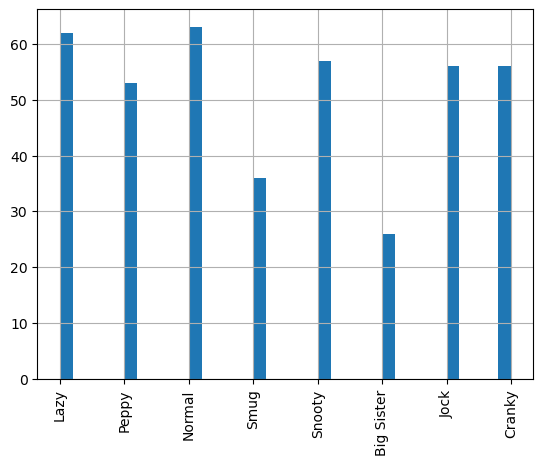

In [10]:
vil['Personality'].hist(bins=35)
plt.xticks(rotation=90)
plt.show

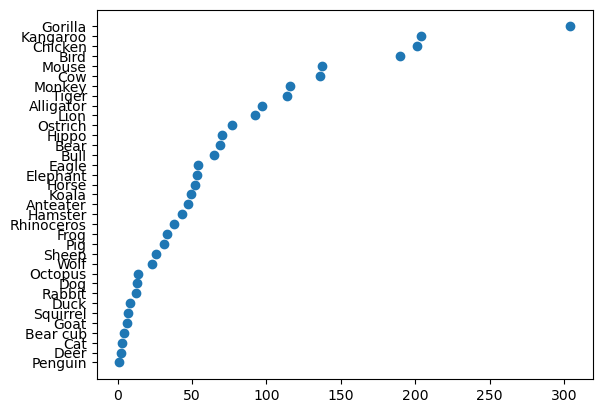

In [11]:
plt.scatter(vil_sort['Rank'], vil_sort.index)
plt.show()

In [12]:
per_sort = vil[['Personality', 'Rank']].groupby('Personality').min().sort_values('Rank')
per_sort

,Rank
Personality,
Lazy,1
Peppy,2
Normal,4
Smug,5
Snooty,10
Big Sister,15
Jock,25
Cranky,31


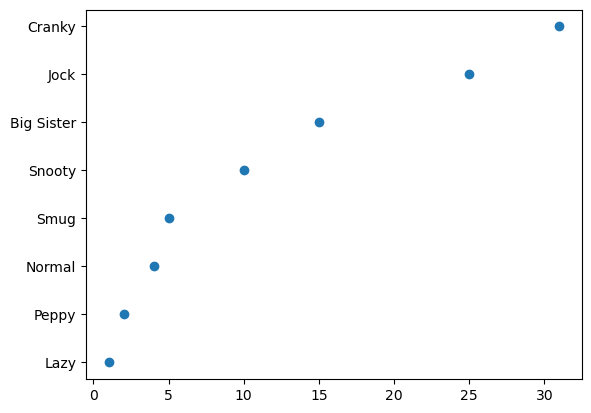

In [13]:
plt.scatter(per_sort['Rank'], per_sort.index)
plt.show()

But, what I want is to compare the "tiers" to see how many of each type are in each tier.

In [16]:
s_tier = (vil['Rank'] >= 1) & (vil['Rank'] <= 69)
a_tier = (vil['Rank'] >= 70) & (vil['Rank'] <= 138)
b_tier = (vil['Rank'] >= 139) & (vil['Rank'] <= 207)
c_tier = (vil['Rank'] >= 208) & (vil['Rank'] <= 276)
d_tier = (vil['Rank'] >= 277) & (vil['Rank'] <= 345)
f_tier = (vil['Rank'] >= 346) & (vil['Rank'] <= 409)

df_s = vil[s_tier]
df_a = vil[a_tier]
df_b = vil[b_tier]
df_c = vil[c_tier]
df_d = vil[d_tier]
df_f = vil[f_tier]

<function matplotlib.pyplot.show(close=None, block=None)>

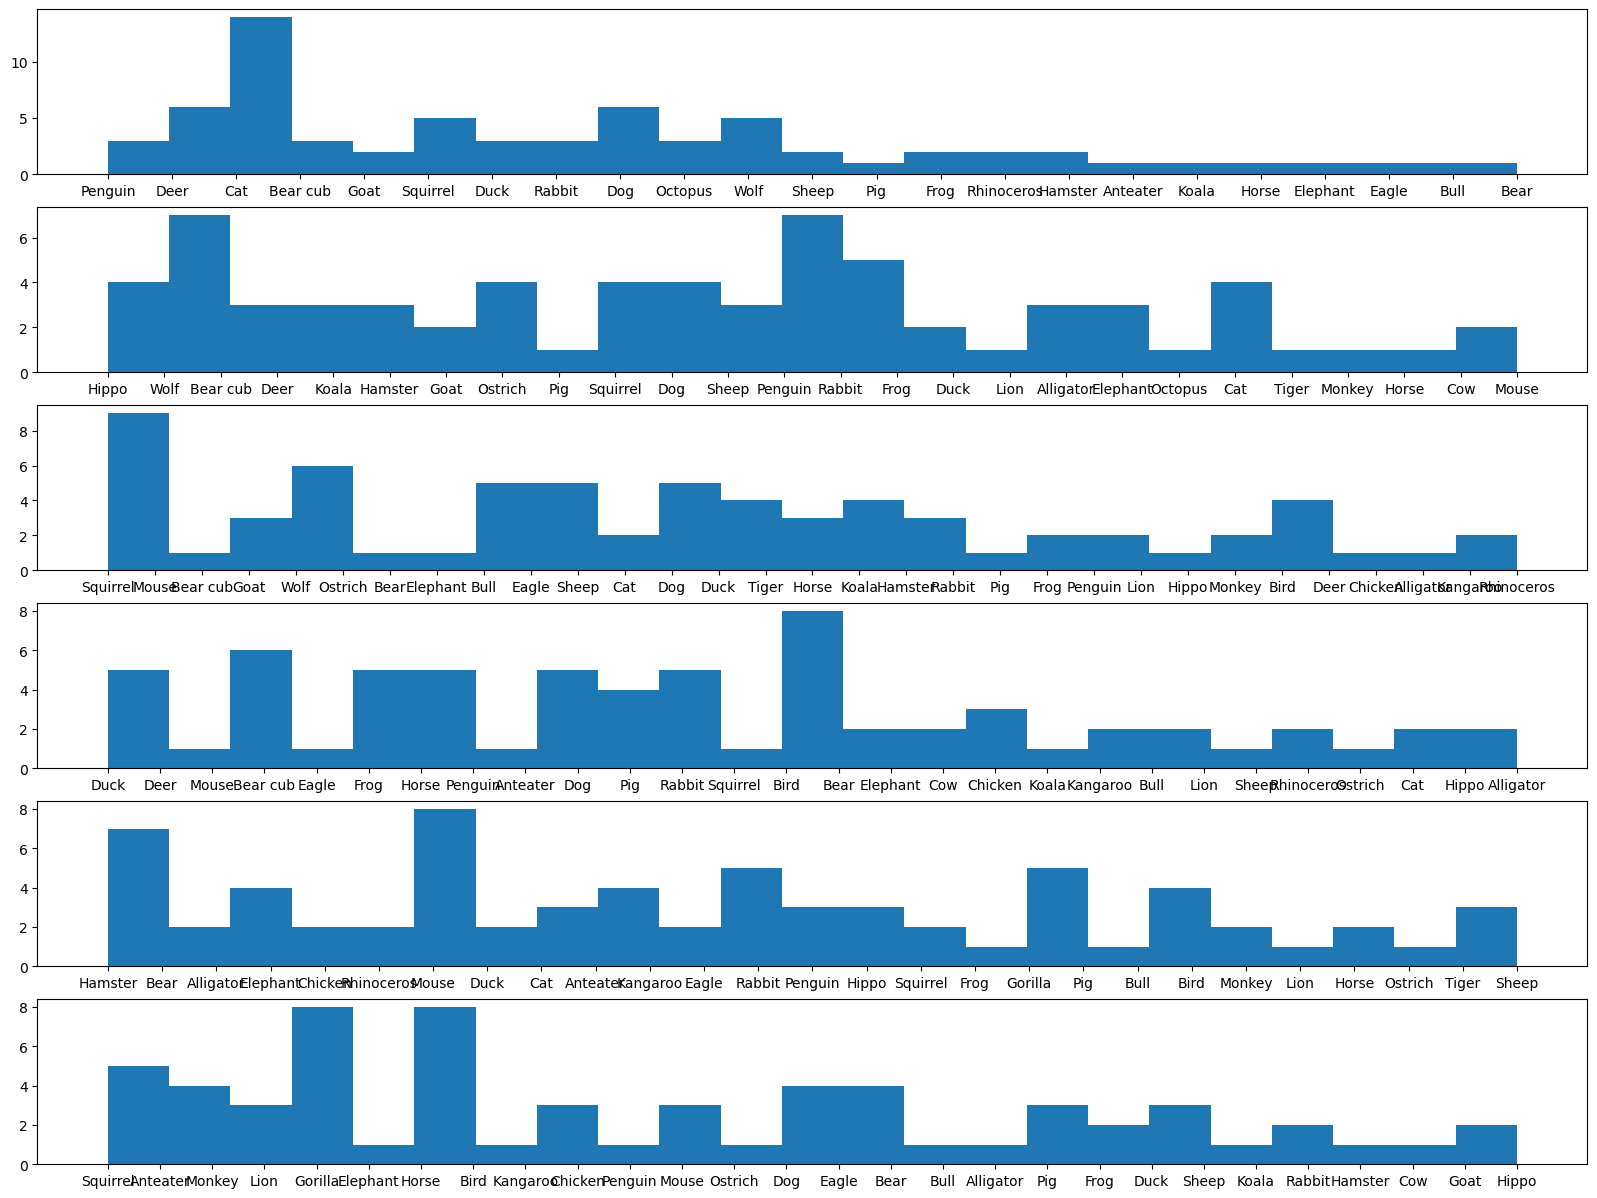

In [49]:
figl, ax1 = plt.subplots(nrows=6, ncols=1, figsize=(20,15))
ax1[0].hist(df_s['Species'], bins=23)
ax1[1].hist(df_a['Species'],bins=23)
ax1[2].hist(df_b['Species'],bins=23)
ax1[3].hist(df_c['Species'],bins=23)
ax1[4].hist(df_d['Species'],bins=23)
ax1[5].hist(df_f['Species'],bins=23)

plt.show